<a href="https://colab.research.google.com/github/souzajvp/data_science_bootcamp/blob/main/modulo_04/Projeto_final_m%C3%B3dulo_04_Jo%C3%A3o_V%C3%ADtor_Perez_de_Souza_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![IMG](https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_04/Prancheta%202.png)

#Um pouco sobre mim:

Meu nome é João Vítor Perez de Souza, sou biomédico e atualmente aluno de doutorado na Universidade Estadual de Maringá-Paraná. Sempre tive gosto pela área de bioinformática, e mais recentemente comecei a aprender sobre programação, ciência de dados e etc. 
***
### Onde encontrar meu trabalho?
1. [ResearchGate](https://www.researchgate.net/profile/Joao_Souza34);
2. [Github](https://github.com/souzajvp) - em construção;
3. [LinkedIn](https://www.linkedin.com/in/jo%C3%A3o-v%C3%ADtor-perez-de-souza/)

# Sobre o que é o meu projeto?

Meu objetivo é avaliar o comportamento da série temporal (ST) de casos de SRAG antes da COVID-19.
***


**Alvos de estudo**:
1. Casos de SRAG (sem especificação do agente causador) de 2009 a 2019 - Extraídos do [OpenDataSus](https://opendatasus.saude.gov.br/dataset?tags=SRAG), processados na minha máquina e disponíveis após limpeza no meu [GitHub](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_04/srag2009-2019_limpocaso.csv).
***
**Objetivos do projeto**:
1. Avaliar a **sazonalidade dos casos de SRAG no Brasil** de 2009 a 2019;
2. Entender o **impacto das pandemias de H1N1 (2009 e 2016) na sazonalidade** de SRAG em geral;
3. Avaliar a autocorrelação da ST em períodos atrasados (Lags) e propor hipóteses para explicá-las;
4. Treinar modelos ARIMA e de ExponentialSmoothing para **prever o número de casos de SRAG em 2019**;
5. Usar o melhor modelo obtido para prever o **esperado de casos de SRAG para 2020**, em um **cenário sem COVID-19**;
***
**Definição de alguns termos**:
1. Síndrome Respiratória Aguda Grave (SRAG) - complicação respiratória grave que pode ser causada por vários vírus respiratórios (Influenza, Parainfluenza, SARS-CoV, etc);
2. COVID-19 - doença causada pelo SARS-CoV-2, pandemia de 2020;
3. Influenza - vírus da gripe;
4. H1N1 - variante do vírus Influenza que causou a pandemia de gripe suína em 2009 e 2016. **Também responsável pela pandemia de 1918** (chamada de gripe espanhola).


## Guia para o notebook:
<font color='Gray'> >> </font> Textos precedidos de sinais na cor <font color='Gray'> Cinza </font> são comentários gerais feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> Vermelha </font> são questionamentos que tentarei responder. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> Azul </font> são respostas e hipóteses levantadas por mim para responder aos questionamentos anteriores.

# Funções e imports 

In [ ]:
!pip install statsmodels --upgrade
!pip install numpy --upgrade

     |████████████████████████████████| 9.5MB 6.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
sns.set()
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
warnings.warn('ARIMA_DEPRECATION_WARN', FutureWarning)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: ARIMA_DEPRECATION_WARN


## Funções



Filtrar o dataframe com duas condições e quero que ela me retorne esses dois dataframes

In [ ]:
def func_line_plot(df_data, eixo_x, eixo_y, hue_var, titulo, x_leg, y_leg, tit_leg):

  ax = sns.lineplot(data=df_data, x=eixo_x, y=eixo_y, hue=hue_var, 
                    palette='rainbow', legend='full')
  ax.figure.set_size_inches((16, 8))
  ax.set_title(titulo, fontsize = 18, y=-0.2)
  ax.legend(loc='best', title=tit_leg, ncol=2)
  ax.set_xlabel(x_leg, fontsize= 14)
  ax.set_ylabel(y_leg, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5)
  ax;

In [ ]:
def func_line_plot_average(df_data, eixo_x, eixo_y, hue_var, titulo, x_leg, y_leg, 
                           tit_leg):
  ax = sns.lineplot(data=df_data, x=eixo_x, y=eixo_y, hue=hue_var, 
                    palette='rainbow', legend='full', linewidth=1.5)
  ax.figure.set_size_inches((16, 8))
  ax.set_title(titulo, fontsize = 18, y=-0.2)
  ax.set_xlabel(x_leg, fontsize= 14)
  ax.set_ylabel(y_leg, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5)
  df_data_plot = df_data.groupby('Semana epidemiológica')
  x = df_data['Semana epidemiológica'].unique()
  y_est = df_data_plot.mean()['Casos semanais reportados até a última atualização']
  y_err = df_data_plot.std()['Casos semanais reportados até a última atualização']
  ax.plot(x, y_est, 'k--', label='Média +- desvio padrão', linewidth=2)
  ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
  ax.legend(loc='best', title=tit_leg, ncol=2)

In [ ]:
def treina_modelo(df_treino: pd.DataFrame, df_teste: pd.DataFrame, var_casos: str, 
                  order:list, periodo_prev: int):

  modelo_ajustado = ARIMA(df_treino[var_casos].values.astype('float32'), 
                          order=order).fit()
  modelo_previsto = modelo_ajustado.forecast(periodo_prev)[0]
  df_teste['PREVISAO'] = modelo_previsto
  return df_treino, df_teste

In [ ]:
def plota_modelo(df_treino: pd.DataFrame, df_teste: pd.DataFrame):
  plt.figure(figsize=(16,9))
  sns.lineplot(x='DT_NOTIFIC', y='CASOS', data=df_treino, label='Dados de treino')
  sns.lineplot(x='DT_NOTIFIC', y='CASOS', data=df_teste, label='Dados de teste')
  sns.lineplot(x='DT_NOTIFIC', y='PREVISAO', data=df_teste, label='Previsão')

In [ ]:
def treina_plota_modelo(df_treino: pd.DataFrame, df_teste: pd.DataFrame, 
                        var_casos: str, order:list, periodo_prev: int,
                        y_label: str, x_label: str, titulo: str):



  df_treino, df_teste = treina_modelo(df_treino, df_teste, var_casos, order, 
                                      periodo_prev)
  plota_modelo(df_treino, df_teste)
  plt.ylabel(y_label, fontsize=16)
  plt.xlabel(x_label, fontsize=16)
  plt.title(titulo, fontsize=20, weight='bold', y=-0.2)

In [ ]:
def decompose_plot(df:pd.DataFrame, var_data:str, var_casos:str, titulo:str):
  """
  Função para executar o seasonal_decompose do statsmodels e plotar os gráficos
  de forma padrão.
  """
  decomp = seasonal_decompose(df[[var_data, var_casos]].set_index(var_data))
  fig, ax = plt.subplots(4,1, figsize=(20,8), sharex=True)
  g1 = decomp.observed.plot(ax=ax[0])
  g2 = decomp.trend.plot(ax=ax[1])
  g3 = decomp.seasonal.plot(ax=ax[2])
  g4 = decomp.resid.plot(ax=ax[3])

  g1.set_ylabel('Observado', fontsize=14)
  g2.set_ylabel('Tendência', fontsize=14)
  g3.set_ylabel('Sazonalidade', fontsize=14)
  g4.set_ylabel('Resíduo', fontsize=14)
  g4.set_xlabel('Data', fontsize=14)

  fig.suptitle(titulo, fontsize=24, y=-0.01)
  plt.show()


In [ ]:
def plota_arima(mod_1:str, mod_1_label:str, mod_2:str, mod_2_label:str, 
                mod_3:str, mod_3_label:str,
                title1:str, title2:str):

  fig, ax = plt.subplots(2,1, figsize=(20,12))
  # Ax1
  sns.lineplot(data = dados_treino, x='DT_NOTIFIC', y='CASOS', label='Dados Treino',
             ax=ax[0])
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y='CASOS', label='Dados Teste',
             ax=ax[0], color='orange')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_1, label= mod_1_label,
             ax=ax[0], color='red', linestyle='--')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_2, label= mod_2_label,
             ax=ax[0], color='green', linestyle='--')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_3, label= mod_3_label,
             ax=ax[0], color='purple', linestyle='--')
  # sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y='PREV_4', label='ARIMA (5,0,5)',
  #              ax=ax[0], color='black', linestyle='--')
  ax[0].set_title(title1, fontsize=22)
  ax[0].set_ylabel('')
  ax[0].set_xlabel('')
  ax[0].tick_params(axis='both', which='major', labelsize=12)


  # Ax2
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y='CASOS', label='Dados Teste',
               ax=ax[1], color='orange')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_1, label= mod_1_label,
             ax=ax[1], color='red', linestyle='--')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_2, label= mod_2_label,
             ax=ax[1], color='green', linestyle='--')
  sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y=mod_3, label= mod_3_label,
             ax=ax[1], color='purple', linestyle='--')
  # sns.lineplot(data = dados_teste, x='DT_NOTIFIC', y='PREV_4', label='ARIMA (5,0,5)',
  #              ax=ax[1], color='black', linestyle='--')
  ax[1].set_title(title2, fontsize=22)
  ax[1].set_ylabel('')
  ax[1].set_xlabel('')

  ax[1].tick_params(axis='both', which='major', labelsize=12)
  fig.text(0.5, 0.06, 'Data', ha='center', fontsize=25)
  fig.text(0.06, 0.5, 'Casos de SRAG', va='center', rotation='vertical', fontsize=25);


In [ ]:
def metrics_arima(lista_colunas: list, lista_nomes: list, lista_order:list):
  resultados = []
  for i in range(len(lista_colunas)):
    rmse = mean_squared_error(dados_teste['CASOS'], 
                              dados_teste[lista_colunas[i]], squared=False)
    r2 = r2_score(dados_teste['CASOS'], dados_teste[lista_colunas[i]])
    resultados.append([lista_nomes[i], (rmse.round(2)), r2, lista_order[i]])
  
  score = pd.DataFrame(columns=['Modelo', 'RMSE', 'R2_score', 'Order'],
                       data=resultados)
  return score

In [ ]:
def plota_2020():

  fig, ax = plt.subplots(2,1, figsize=(20,12))
  # AX 0 - Dados de treino, teste e resultados

  sns.lineplot(data=dados_treino, x='DT_NOTIFIC', y='CASOS', ax=ax[0],
               label='Dados de treino (SRAG 2010-2018)')
  sns.lineplot(data=dados_teste, x='DT_NOTIFIC', y='CASOS', color='orange', ax=ax[0],
               label='Dados de teste (SRAG 2019)')
  ax[0].plot(datas_20[:12], arima_2[0][:12], 'g--', label='Validação do modelo para 2019')
  ax[0].plot(datas_20[12:], arima_2[0][12:], 'r--', label='Previsão do modelo para 2020')
  ax[0].set_ylabel('')
  ax[0].set_xlabel('')
  ax[0].set_title('Dados de treino, teste e previsão de casos de SRAG para 2020',
               fontsize=22)
  # AX 1 - Dados de teste e resultados

  sns.lineplot(data=dados_teste, x='DT_NOTIFIC', y='CASOS', color='orange', ax=ax[1],
               label='Dados de teste (SRAG 2019)')
  ax[1].plot(datas_20[:12], arima_2[0][:12], 'g--', label='Validação do modelo para 2019')
  ax[1].plot(datas_20[12:], arima_2[0][12:], 'r--', label='Previsão do modelo para 2020')
  ax[1].fill_between(datas_20[12:], erro_neg[12:], erro_pos[12:],
                  alpha=0.3, color='gray', label='Intervalo de confiança 2020')
  ax[1].set_ylabel('')
  ax[1].set_xlabel('')
  ax[1].set_title('Validação do modelo + previsão de casos de SRAG para 2020 (IC 95%)',
               fontsize=22)

  ax[0].tick_params(axis='both', which='major', labelsize=12)
  ax[1].tick_params(axis='both', which='major', labelsize=12)
  fig.text(0.5, 0.06, 'Data', ha='center', fontsize=20)
  fig.text(0.06, 0.5, 'Casos de SRAG', va='center', rotation='vertical', fontsize=20);
  ax[0].legend()
  ax[1].legend()
  plt.legend()


#SRAG a nível de país

<font color='gray'> >> </font> Coletei a base de dados de SRAG completa do OpenDataSus e fiz [algumas modificações](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_04/srag2009-2019_limpocaso.csv) para reduzir o tamanho do arquivo, bem como facilitar o trabalho aqui.
***
**Importante:** Diferentemente do que acontece na pandemia de COVID-19, não era realizada testagem em massa da população para outros vírus causadores de SRAG (vírus Influenza, Parainfluenza e etc). Desta forma, não existem dados disponíveis que sejam da mesma escala que os dados de testagem de COVID-19. Além disso, os dados representam casos de SRAG reportados nos anos passados, estes, são situações de alerta/emergência em que o paciente precisou de internação. 

In [ ]:
url = 'https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_04/srag2009-2019_limpocaso.csv'
srag = pd.read_csv(url, sep=';', encoding="ISO-8859-1")

srag.DT_NOTIFIC = pd.to_datetime(srag['DT_NOTIFIC'], format='%Y-%m-%d')

# Variável dummy para quantificar os casos/dia
srag['CASOS'] = 1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Transformando a base de dados para períodos ANO/MES

In [ ]:
srag_month = srag.set_index('DT_NOTIFIC').resample('M').agg({'CASOS':'sum'}).reset_index()

srag_month['ANO'] = srag_month['DT_NOTIFIC'].dt.year
srag_month['MES'] = srag_month['DT_NOTIFIC'].dt.month
srag_month['MEDIA_MOVEL'] = srag_month['CASOS'].rolling(3, center=True).mean()

srag_month.head(3)

,DT_NOTIFIC,CASOS,ANO,MES,MEDIA_MOVEL
0,2009-04-30,69,2009,4,NaN
1,2009-05-31,562,2009,5,1689.000000
2,2009-06-30,4436,2009,6,8025.666667


### Casos de SRAG 2009/2020* no Brasil por mês
***
*Dados referentes ao início de 2020, antes da COVID-19

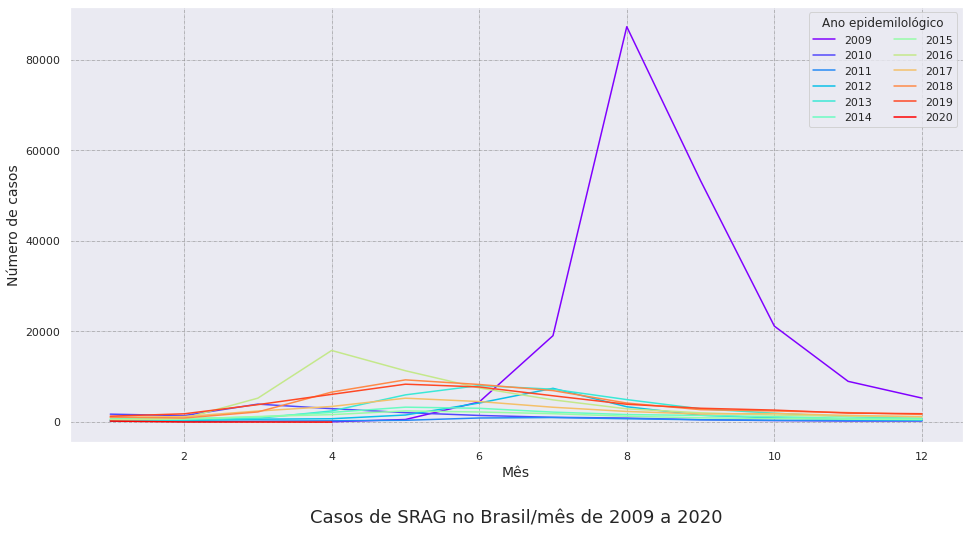

In [ ]:
func_line_plot(srag_month, 'MES', 'CASOS', 'ANO', 'Casos de SRAG no Brasil/mês de 2009 a 2020',
              'Mês', 'Número de casos', 'Ano epidemilológico')

<font color='blue'>>></font> Na figura acima notamos como há grande destaque para o **número de casos de SRAG em 2009**. Em 2009 o mundo foi atingido pela pandemia de H1N1 (gripe suína). <br> A população mais jovem não entrava em contato com essa variante do vírus Influenza há décadas e também a vacinação anual não oferecia proteção contra o Influenza H1N1, assim o número de casos de SRAG foi muito maior do que em situações "rotineiras". <br>
Fora essa observação, os outros anos apresentam distribuição semelhante de casos, com aumento nos meses do inverno.



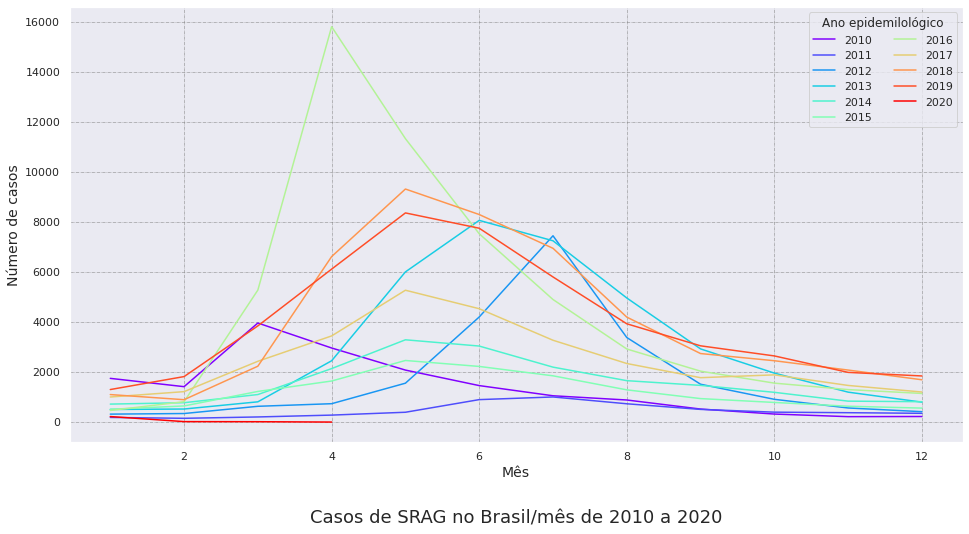

In [ ]:
func_line_plot(srag_month.query('ANO != 2009'), 'MES', 'CASOS', 'ANO', 'Casos de SRAG no Brasil/mês de 2010 a 2020',
               'Mês', 'Número de casos', 'Ano epidemilológico')

<font color='blue'>>></font> Ao eliminarmos 2009 do gráfico, notamos como as outras curvas parecem ter um comportamento semelhante. Podemos destacar o ano de 2016 (verde claro) que apresenta o pico de casos maior e anterior ao dos outros anos.<br>
**Curiosamente**, também houve epidemia de Influenza H1N1 (gripe suína) em 2016, porém **desta vez a população já estava vacinada ou já havia entrado em contato** com o vírus em 2009, reduzindo drasticamente o total de casos observados!

### Decompondo as curvas
***
A análise de decomposição sazonal nos permite separar os componentes de uma ST. Podemos avaliar qual é a **tendência geral**, qual o **efeito da sazonalidade** nos casos e também o **resíduo**, que indica valores não explicados pelas duas características anteriores.

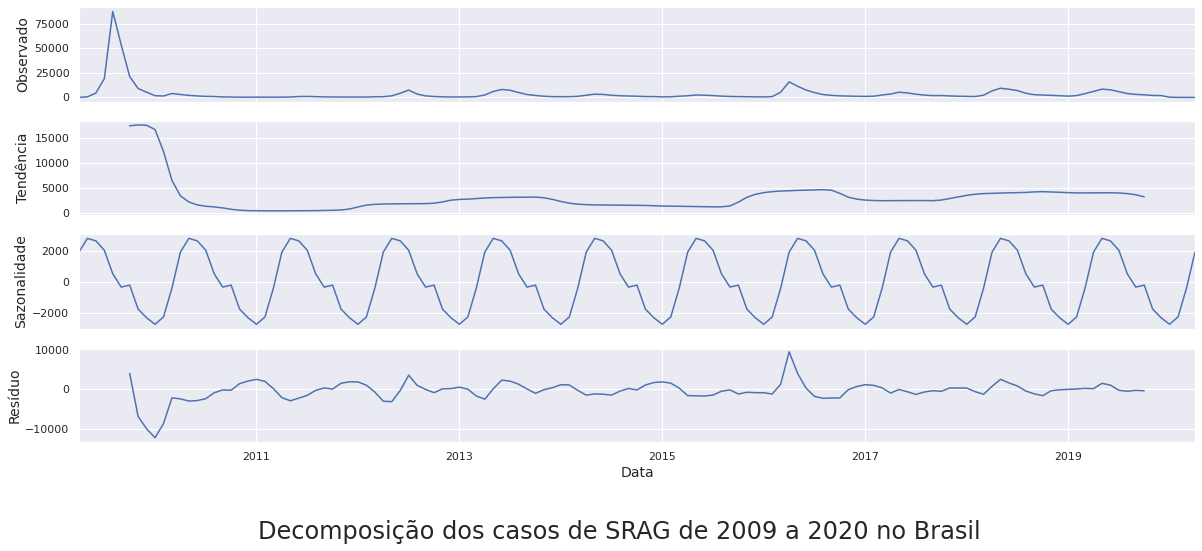

In [ ]:
decompose_plot(srag_month, 'DT_NOTIFIC', 'CASOS', 'Decomposição dos casos de SRAG de 2009 a 2020 no Brasil')

<font color='blue'>>></font>**Tendência**: Apesar da escala tornar difícil a visualização, notamos que de modo geral o número de casos de SRAG não se altera tanto assim através dos anos. Aumento pode ser notado em 2016, referente a segunda pandemia de H1N1, e levemente em outros anos como 2013, 2018 e 2019. <br>
<font color='blue'>>></font>**Sazonalidade**: Notamos como a **Sazonalidade dos casos de SRAG é clara**. Notamos aumento considerável dos casos durante o período de inverno, com quedas nos períodos mais quentes do ano. <br>
<font color='blue'>>></font> **Resíduo**: Observamos que o fator não explicado pela tendência ou sazonalidade tem uma grande amplitude nos nossos dados. Possivelmente, essa oscilação grande é dada pela **influência de 2009 na série temporal**.

#### <font color='Red'> >> </font> E se removermos 2009 do dataset?
***
Considerando a enorme diferença observada no número de casos de SRAG em 2009, o padrão observado pode não representar o esperado de casos de SRAG causados pelo vírus Influenza comum.

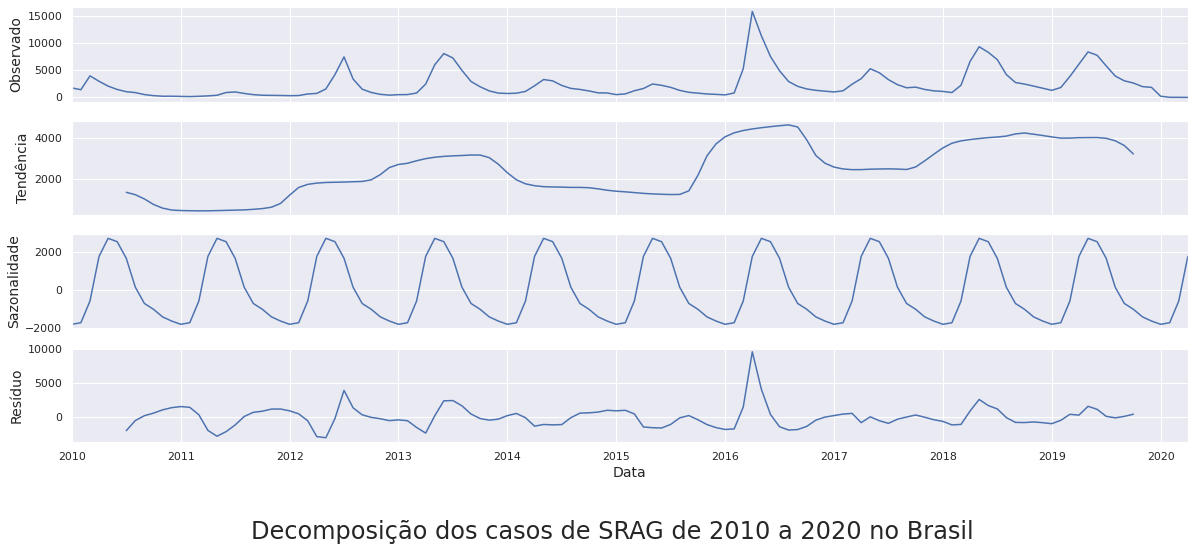

In [ ]:
decompose_plot(srag_month.query('ANO !=2009'), 'DT_NOTIFIC', 'CASOS', 'Decomposição dos casos de SRAG de 2010 a 2020 no Brasil')

<font color='blue'>>></font> **Após a remoção de 2009**, notamos diferenças importantes: 
***
* A **tendência** parece mostrar um padrão crescente no número de casos desde 2010 (com flutuações notáveis). Essa tendência culmina com os anos de **2018 e 2019** que apresentaram número de casos **considerávelmente altos para anos não pandêmicos**. Mais tarde aprendemos que o **número de casos observados em 2018 e 2019** não seria <font color='red'> **nada perto do número de casos de SRAG causados pela pandemia de COVID-19**.</font>
* A **sazonalidade** muda pouco quando comparada à figura anterior. Na verdade, notamos que os valores **aditivos** atribuidos para efeitos sazonais (**-2000 a 2000**) continuam os mesmos. <br>
* Grande diferença pode ser observada nos **resíduos**. Apesar da presença de picos com grandes valores em anos pandêmicos como 2016 ou epidêmicos (2013), de forma geral há menor variação do que na análise com 2009 no dataset.

## <font color='gray'>>></font> Com base nos resultados anteriores, decidi <font color='red'> remover o ano de 2009 das análises</font>

In [ ]:
srag_month = srag_month.query('ANO != 2009')

### <font color='red'>>></font>  Estacionariedade
***
>Análises de ST costumam necessitar que os dados sejam estacionários, ou seja, que tenham variância e co-variância constantes. Nem sempre temos esta característica quando trabalhando com dados reais.<br>
Um método para avaliar a estacionariedade é o *Augmented Dickey-Fuller test*. Com base nos resultados obtidos, podemos entender que há maior o menor chance de nossos dados serem estacionários.

In [ ]:
resultado = adfuller(srag_month['CASOS'].values)
print(f'Estatística ADF = {resultado[0]}')

print(f'p-valor = {resultado[1]}')

Estatística ADF = -5.877119581949424
p-valor = 3.140460276616342e-07


Considerando a **negatividade da estatística ADF e p-valor muito menor que 0.05**, poderíamos assumir que existe grande chance que nossos dados sejam estacionários.

### <font color='red'>>></font> Auto correlação (ACF) e Auto correlação parcial (PACF)
Apesar de um pouco abstratas, a ACF e PACF podem nos mostrar qual é a correlação da nossa série temporal com períodos (lags) anteriores. 

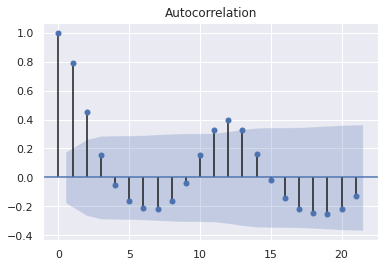

In [ ]:
plot_acf(srag_month['CASOS'].values);

<font color='blue'>>></font> A partir do gráfico acima, notamos como existe padrão na "*Autocorrelation*" similar a um **comportamento** de onda, **que se repete a cada 6 lags**. 
<br>

Possivelmente, isso é devido à <font color='green'>sazonalidade dos vírus respiratórios causadores de SRAG </font>, onde de **janeiro a julho** (aproximadamente) há um notável crescimento no número de casos. Enquanto de **julho a dezembro** (aproximadamente) observa-se notável queda no número de casos. Alternado esses períodos, é esperado que em metade do ano tenhamos correlações positivas entre o número de casos e na outra metade, que essas correlações caiam até atingirem valores negativos. <br> 
***
Interessantemente, notamos como a "*Autocorrelation*" com o Lag 12 fica próxima do intervalo de confiança. Durante as análises desse módulo, vimos que o Lag 12 tinha uma "*Autocorrelation*" importante nos casos de **tuberculose**. Possivelmente, essa diferença se dá pela dinâmicas de transmissão de cada doença:
1. Para a **tuberculose**, temos transmissão e manifestação mais lenta do agente etiolóigico (*Mycobacterium tuberculosis*), podendo levar décadas até que a doença se manifeste e o indivíduo possa transmitir a bactéria. Assim, a influencia de um período de 12 meses é mais significativa no ano seguinte;
2. Para a **SRAG** (Influenza e outros), a influência que um mês tem no outro é mais significativa do que o período de 12 meses anteriores tem no ano atual. Ainda assim, notamos que o **LAG 12 é significativo**, o que poderia explicar períodos como **2018 e 2019**, onde a alta no número de casos de SRAG se manteve.

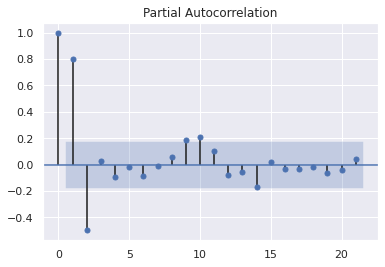

In [ ]:
plot_pacf(srag_month['CASOS']);

<font color='blue'>>></font> Por outro lado, ao normalizar os dados de acordo com o Lag 1, observamos um padrão semelhante na "*Partial Autocorrelation*", porém deslocado para a direita e com menor signifcância.

## <font color='red'> >> </font>É possível prever o número de casos de SRAG utilizando dados históricos?
***
A capacidade de prever os meses em que teremos os picos de casos de SRAG e ainda o número desses casos em períodos futuros trata-se de uma ferramenta importante para planejamentos estratégicos. <br>
Apesar de que prever o acontecimento de uma pandemia como a de H1N1 ou ainda de COVID-19 é extremamente complexo, avaliar as frequências de gripe sazonal (ou formas graves causadas por ela, como a SRAG) é consideravelmente mais simples.
***
Existem vários métodoos para predizer séries temporais. Um dos mais conhecidos é o **ARIMA**. Este modelo usa componentes Auto-Regressivos e de Média Móvel da ST para prever eventos futuros.
***
**Procedimento**
Ao criar modelos preditivos, é comum que separemos nossos dados em frações para treino e para teste. A partir da validação do modelo com os dados de teste, podemo usa-lo para prever dados não disponíveis

### <font color='red'> >> </font> Testando modelos do método `auto_arima` e `ARIMA` 
***
Modelos da família ARIMA são frequentemente usados para prever e analisar séries temporais. Esses modelos utilizam componentes:
1. Auto Regressivos (*p*);
2. Integração (*d*), utilizados para transformar a ST em forma estacionária;
3. Média móvel (*q*).
<br>
Além desses parâmetros, os modelos ARIMA são capazes de trabalhar com dados que apresentem sazonalidade e tendência. Desta forma, podemos especificar períodos de repeticação da nossa ST para que o modelo seja mais adequado aos dados de estudo.
***
A Ferramenta auto_arima, permite executar de forma sistêmcia o "encaixe" dos dados em modelos com diferentes parâmetros. A análise do método tem alguns problemas técnicos no Google Colaboratory, portanto omiti os testes.

Fonte de algumas informações: <br>

 [How to Create an ARIMA Model for Time Series Forecasting in Python
](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

Separando dados de `teste` e `treino`

In [ ]:
dados_treino = srag_month.query('ANO != 2019 & ANO != 2020')
dados_teste = srag_month.query('ANO == 2019')

Treinando 3 modelos com configurações obitidas após testes manuais ou automatizados.

In [ ]:
o_auto, o2, o3, o4 = (2,0,0), (12,1,1), (12,0,1), (5,0,5)

arima_auto = ARIMA(dados_treino['CASOS'].values.astype('float32'), 
                          order=o_auto).fit().forecast(12)[0]
arima_2 = ARIMA(dados_treino['CASOS'].values.astype('float32'), 
                          order=o2).fit().forecast(12)[0]
arima_3 = ARIMA(dados_treino['CASOS'].values.astype('float32'), 
                          order=o3).fit().forecast(12)[0]
# arima_4 = ARIMA(dados_treino['CASOS'].values.astype('float32'), order=o4).fit().forecast(12)[0]


# arima_previsto = arima_ajustado.forecast(12)[0]
dados_teste['PREV_AUTO'] = arima_auto
dados_teste['PREV_2'] = arima_2
dados_teste['PREV_3'] = arima_3
# dados_teste['PREV_4'] = arima_4

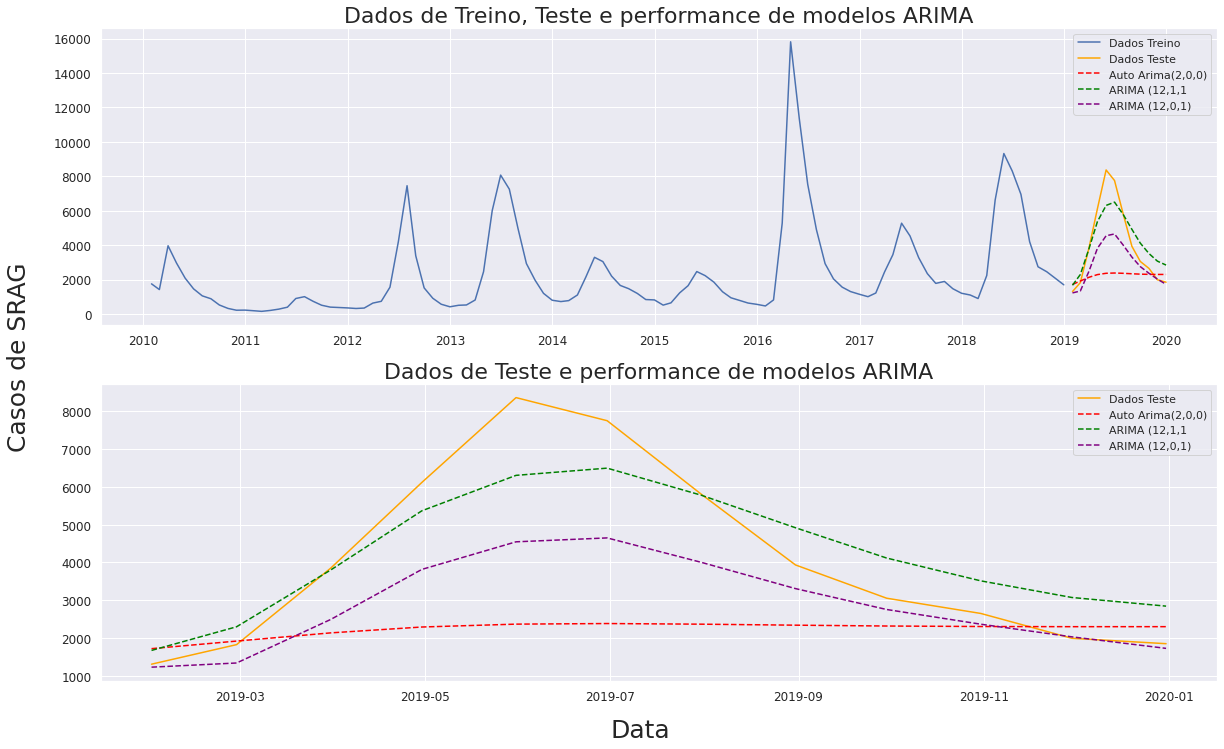

In [ ]:
plota_arima('PREV_AUTO', 'Auto Arima(2,0,0)', 'PREV_2', 'ARIMA (12,1,1',
            'PREV_3', 'ARIMA (12,0,1)', 'Dados de Treino, Teste e performance de modelos ARIMA',
            'Dados de Teste e performance de modelos ARIMA')

<font color='blue'> >></font> Ao avaliar os modelos testados com `ARIMA` e `auto_arima`, notamos que o que aparenta melhores resultados é o modelo` ARIMA(12,1,1)`. Para confirmar essses resultados, calculei algumas métricas do modelo.

In [ ]:
metrics_arima(['PREV_AUTO', 'PREV_2', 'PREV_3'],
              ['AUTO_ARIMA', 'PREV_2', 'PREV_3'],
              [(2,0,0), (12,1,1), (12,0,1)])

,Modelo,RMSE,R2_score,Order
0,AUTO_ARIMA,2858.21,-0.523951,"(2, 0, 0)"
1,PREV_2,989.66,0.817292,"(12, 1, 1)"
2,PREV_3,1719.28,0.448586,"(12, 0, 1)"


<font color='blue'> >></font> Os resultados acima confirmam a hipótese da análise visual dos resultados. O modelo PREV_2, um modelo **ARIMA de ordem (12,1,1)** se mostrou o mais **eficiente em prever os casos de SRAG em 2019**.
***
<font color='gray'> >></font> Entendendo os indicadores utilizados:
1. O **RMSE** representa o Erro Médio Quadrático (do inglês *Root Mean Squared Errors*) dos valores reais em relação ao modelo. Esse índice é útil pois nos reflete em valores absolutos quanto o nosso modelo errou, em média. Esse índice permite interpretar o erro do modelo de forma simples e direta: um RMSE de 989 (apresentado pelo PREV_2), indica que, em média, o modelo errou o número de casos de SRAG em 2019 em 989 (independente se foi um erro negativo ou positivo);
2. O **R2_score**, também conhecido como **R²** ou **Coeficiente de determinação**, indica o quanto o nosso modelo explica a variância da amostra. Considerando um R² de 0.817292, podemos dizer que o modelo PREV_2 explica 81,72% da variância dos dados reais. Quanto maior o R², mais ajustado nosso modelo está à aos dados.

### <font color='red'> >> </font> E se tentarmos modelos alternativos ao ARIMA?
***
Para avaliar se seria possível obter previsões com melhor desempenho, também executei análises com modelos de *Exponential smoothing*.
> Suavização exponencial (*Exponential smoothing*) é um método de predição em séries temporais univariadas que suporta dados com tendências sistêmicas ou componentes sazonais.
> É um método poderoso que pode ser usado como alternativa para os populares métodos da família Box-Jenkins ARIMA.

<br>
Traduzido de: <br>

 [A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)


In [ ]:
# dados_treino = srag_month.query('ANO != 2019 & ANO != 2020')[['DT_NOTIFIC', 'CASOS']]
# dados_teste = srag_month.query('ANO == 2019')[['DT_NOTIFIC', 'CASOS']]

In [ ]:
#### Treinando modelo ExpSmoothing Aditivo e Aditivo
modelo_ajustado_add_add = ExponentialSmoothing(dados_treino['CASOS'].values, 
    trend='add', seasonal='add', seasonal_periods=12).fit()

modelo_previsto_add_add = modelo_ajustado_add_add.predict(start=117, end=128)

# Otimizando modelos
t1,d1,s1,p1,b1,r1 = 'mul', False, 'add', 12, True, True
t3,d3,s3,p3,b3,r3 = 'add', False, 'add', 12, True, True

modelo_ajustado_1 = ExponentialSmoothing(dados_treino['CASOS'].values, 
    trend=t1, damped=d1, seasonal=s1, seasonal_periods=12).fit(optimized=True,
                                                               use_boxcox=b1, 
                                                               remove_bias=r1)
modelo_ajustado_3 = ExponentialSmoothing(dados_treino['CASOS'].values, 
    trend=t3, damped=d3, seasonal=s3, seasonal_periods=12).fit(optimized=True,
                                                               use_boxcox=b3, 
                                                               remove_bias=r3)
    
modelo_previsto_1 = modelo_ajustado_1.predict(start=117, end=128)
modelo_previsto_3 = modelo_ajustado_3.predict(start=117, end=128)

# #### Treinando modelo autoregressivo Usando LAG 12
# lista = np.linspace(1,12,12)
# modelo_ajustado_autoreg = AutoReg(dados_treino['CASOS'].values, lags=lista, trend='c', seasonal=True, period=12).fit()
# modelo_previsto_autoreg = modelo_ajustado_autoreg.predict(start=117, end=128)

### Colocando os resultados em novas variáveis nos nosso dados
dados_teste['ADD_ADD'] = modelo_previsto_add_add
dados_teste['MOD_001'] = modelo_previsto_1
dados_teste['MOD_003'] = modelo_previsto_3

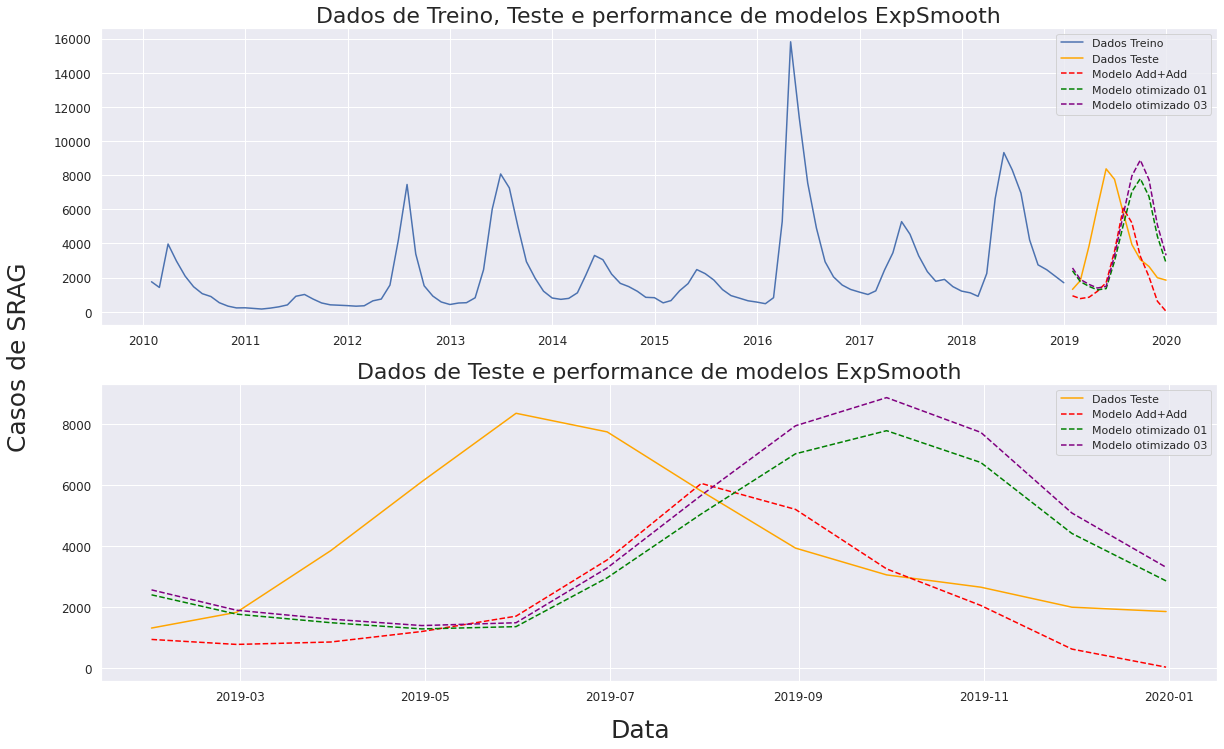

In [ ]:
plota_arima('ADD_ADD', 'Modelo Add+Add', 'MOD_001', 'Modelo otimizado 01', 
            'MOD_003', 'Modelo otimizado 03',
            'Dados de Treino, Teste e performance de modelos ExpSmooth',
            'Dados de Teste e performance de modelos ExpSmooth')

Calculando algumas métricas

In [ ]:
metrics_arima(['ADD_ADD', 'MOD_001', 'MOD_003'],
              ['Add_Add', 'Otimizado_001', 'Otimizado_003'],
              [('Trend:add', 'Seazoal:add'), ('mul', False, 'add', 12, True, True), ('add', False, 'add', 12, True, True)])


,Modelo,RMSE,R2_score,Order
0,Add_Add,2945.46,-0.618408,"(Trend:add, Seazoal:add)"
1,Otimizado_001,3638.37,-1.469423,"(mul, False, add, 12, True, True)"
2,Otimizado_003,3918.95,-1.864980,"(add, False, add, 12, True, True)"


<font color='blue'>>></font> Considerando os resultados obtidos com os modelos `ARIMA` e `ExponentialSmoothing`, o melhor modelo foi o **PREV_2 - ARIMA (12,1,1)**. <br>
***
Com esse modelo, obtivemos os seguintes *scores* finais:
1. **RMSE** - 989.65;
2. **R²** - 0.81;


## <font color='red'>>></font> Seria possível prevermos o esperado de casos de SRAG para 2020 com esse modelo?
***
Com o impacto da pandemia de COVID-19, torna-se difícil diferenciar SRAG causada por outros vírus (como Influenza) das causadas pelo SARS-CoV-2. Assim, fica complexo trabalhar com dados de SRAG não causadas por COVID-19.<br>
**Alguns fatores que influenciam nessa dificuldade:**
1. De modo geral, o Brasil faz pouquíssimos testes para cada caso positivo encontrado. Dessa forma, a subnoticiação e subidentificação dos casos é grande.
>[Quase 7 milhões de testes de Covid podem perder a validade dentro de armazém do governo](https://g1.globo.com/jornal-nacional/noticia/2020/11/23/quase-7-milhoes-de-testes-de-covid-podem-perder-a-validade-dentro-de-armazem-do-governo.ghtml)
***Obs**: Em casos graves como SRAG, a testagem dos pacientes é mais garantida, uma vez que estão internados;
2. A incidência de outros vírus respiratórios caiu, enquanto o coronavírus se espalha. <br>
***Obs**: Medidas de distanciamento, uso de máscaras e etc também são eficazes contra outros vírus respiratórios. Desta forma a pequena quantidade de casos (*quando comparado aos casos de COVID-19*) rotineira, foi reduzida ainda mais.
***
Assim, o uso de um **modelo treinado e eficaz** pode nos ajudar a entender **a magnitude do excesso de casos de COVID-19 em 2020**.

In [ ]:
# Treinando o modelo com os melhores parâmetros obtidos
arima_2 = ARIMA(dados_treino['CASOS'].values.astype('float32'), 
                          order=o2).fit().forecast(24)

datas_20 = pd.date_range(start='2019-01-31', end='2020-12-31', freq='M')

# Coletando o intervalo de confiança dos resultados
erro_neg = []
erro_pos = []
for i in range(len(arima_2[2])):
  erro_neg.append(arima_2[2][i][0])
  erro_pos.append(arima_2[2][i][1])


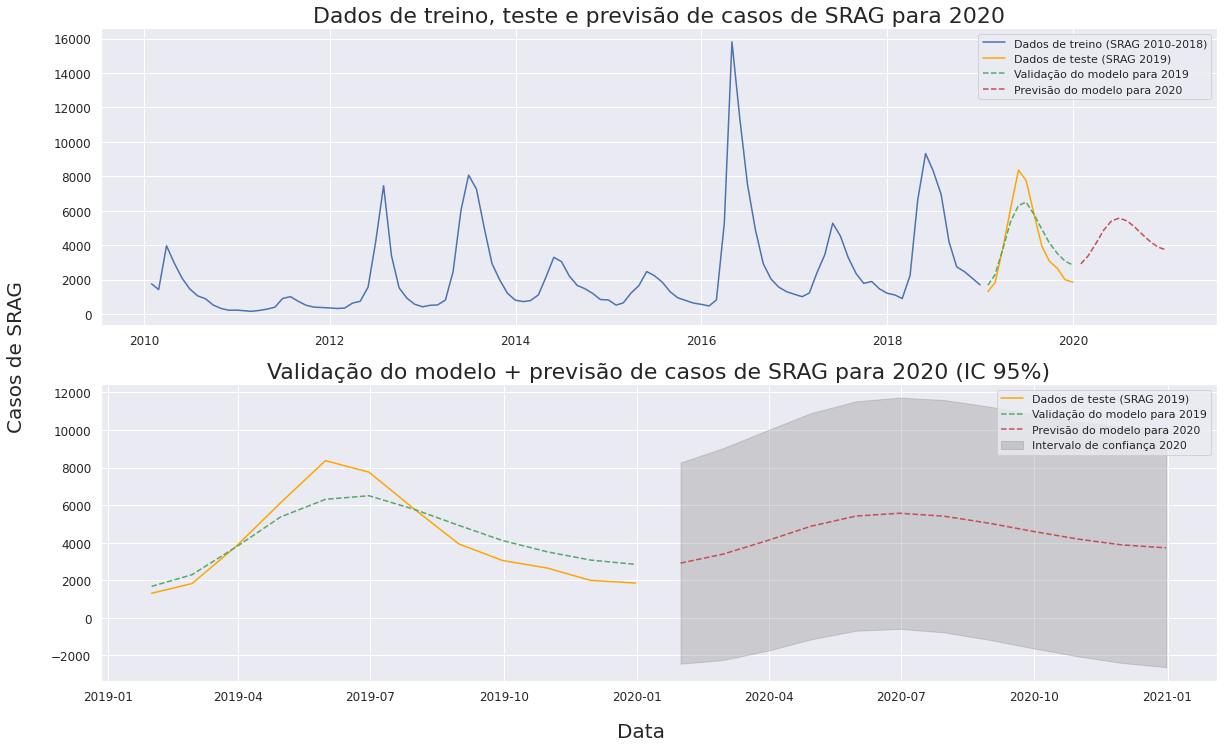

In [ ]:
plota_2020()

<font color='blue'> >> </font> Na figura acima podemos observar o comportamento do modelo **ARIMA(12,1,1)** em relação:
1. Aos dados de <font color='blue'>  treino (SRAG 2010-2018) </font>;
2. Aos dados de <font color='orange'>  teste (SRAG 2019) </font>;
3. A <font color='red'>  Previsão feita para 2020 </font>, considerando o efetividade do modelo em 2019;
4. O <font color='gray'>intervalo de confiança </font>para a previsão de 2020.
***
De forma geral, a previsão média para 2020 se assemelha à previsão feita para 2019. Também é notável como o **intervalo de confiança é bastante amplo**, indicando que **esse modelo precisa ser melhor refinado** para aplicações no mundo real.<br>
***Obs:** Neste trabalho, decidi utilizar os dados agrupados por mês. Isso pode ter ajudado ou pelo menos influenciado na performance do meu modelo. Possivelmente, um modelo capaz de determinar quais semanas mostrariam o pior número de casos de SRAG seria mais útil do que a previsão a nível de mês.

## <font color='red'>>></font> Teste com médias
***
Considerando como a ST de casos de SRAG se comporta de forma claramente sazonal e que **normalmente o número de casos não varia tanto** de um ano para o outro, **como saber se o modelo é realmente bom**? <br>
Alguns compartivos interessantes são:
1. Comparar a **média e desvio padrão da ST** (2010-2019) com a previsão feita para 2020 - previsão mais geral;
2. Comparar a **média e desvio padrão de 2018 e 2019** com a previsão feita para 2020 - previsão mais "pessimista";


Coletando as variáveis

In [ ]:
validacao = pd.DataFrame()
validacao['MEDIA_ST'] = srag_month.query('ANO not in [2020]').groupby('MES')['CASOS'].mean()
validacao['SD_ST'] = srag_month.query('ANO not in [2020]').groupby('MES')['CASOS'].std()
validacao['MEDIA_18_19'] = srag_month.query('ANO in [2018, 2019]').groupby('MES')['CASOS'].mean()
validacao['SD_18_19'] = srag_month.query('ANO in [2018, 2019]').groupby('MES')['CASOS'].std()
validacao.reset_index(inplace=True)

### <font color='red'>>></font> Média + SD de SRAG 2010-2019 contra modelo de previsão para 2020


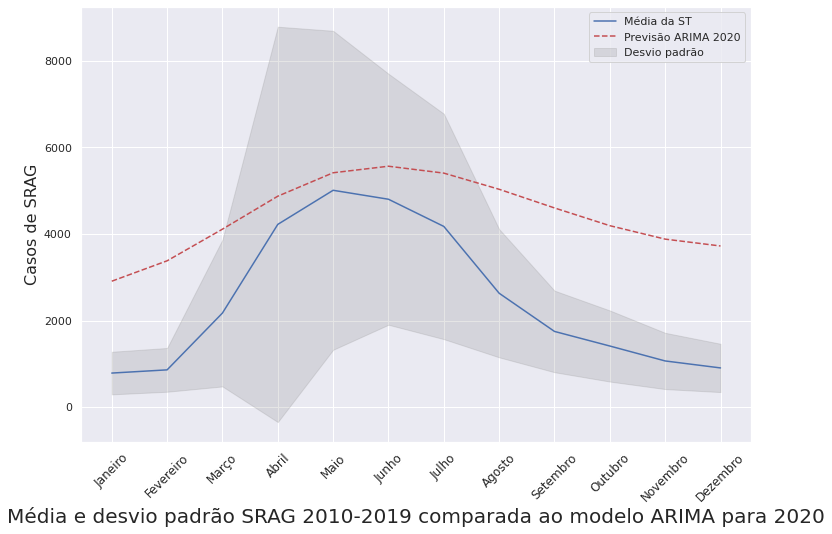

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=validacao, x='MES', y='MEDIA_ST', label='Média da ST', ax=ax)
ax.plot(validacao.MES, arima_2[0][12:], 'r--', label='Previsão ARIMA 2020')
ax.fill_between(validacao.MES, (validacao['MEDIA_ST'] - validacao['SD_ST']),
                (validacao['MEDIA_ST'] + validacao['SD_ST']), label='Desvio padrão',
                color ='gray', alpha=0.2)
ax.set_ylabel('Casos de SRAG', fontsize=16)
ax.set_xlabel('', fontsize=16)
ax.set_xticks([i for i in range(1,13)])
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                   rotation=45, fontsize=12)

plt.title('Média e desvio padrão SRAG 2010-2019 comparada ao modelo ARIMA para 2020',
          fontsize=20, y=-0.2)
plt.legend();

<font color='blue'>>></font> Na figura acima notamos como as duas linhas se assemelham em alguns aspectos e se diferenciam em outros:
1. O pico de casos registrados <font color='blue'>pela média se da em maio</font>, enquanto o pico do <font color='red'>modelo é em junho</font>;
2. O modelo ARIMA determinou uma **curva com menores inclinações do que os dados reais**. Claramente o modelo estimou que 2020 começaria com alto número de casos já em janeiro e que o aumento gradual até junho seria menos intenso do que em outros anos;


### <font color='red'>>></font> Média + SD de SRAG 2018-2019 contra modelo de previsão para 2020


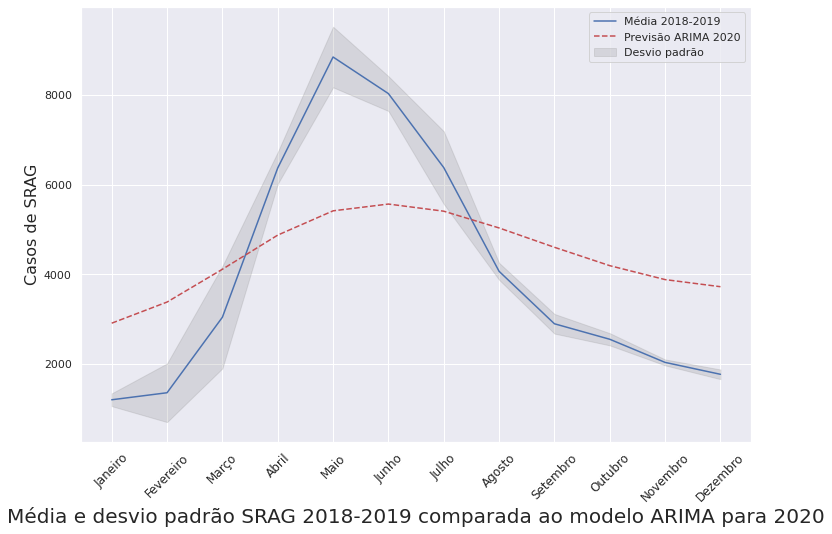

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=validacao, x='MES', y='MEDIA_18_19', label='Média 2018-2019', ax=ax)
ax.plot(validacao.MES, arima_2[0][12:], 'r--', label='Previsão ARIMA 2020')
ax.fill_between(validacao.MES, (validacao['MEDIA_18_19'] - validacao['SD_18_19']),
                (validacao['MEDIA_18_19'] + validacao['SD_18_19']), label='Desvio padrão',
                color ='gray', alpha=0.2)
ax.set_ylabel('Casos de SRAG', fontsize=16)
ax.set_xlabel('', fontsize=16)
ax.set_xticks([i for i in range(1,13)])
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                   rotation=45, fontsize=12)

plt.title('Média e desvio padrão SRAG 2018-2019 comparada ao modelo ARIMA para 2020',
          fontsize=20, y=-0.2)
plt.legend();

<font color='blue'>>></font> Já neste segundo caso, comparando a média dos últinos, podemos notar que o modelo foi mais "otimista" do que os dados reais. <br>
Além disso, as duas considerações feitas na figura anterior se mantém para esta análise: **i)** o pico de casos do modelo está 1 mês atrasado; **ii)** a inclinação da curva determinada pelo modelo é bem mais suave do que os dados reais.


## <font color='gray'> >></font> Uma breve discussão sobre vacinas
***
A base de dados do OpenDatasus acumula mais de 100 variáveis sobre os casos de SRAG. Dentre elas, temos a variável `'VACINA'` que nos diz se o indivíduo foi vacinado contra gripe em campanhas recentes. <br>

### <font color='red'> >></font> Será que a vacinação tem efeito na evolução dos casos?

In [ ]:
vacina = pd.crosstab(srag['EVOLUCAO'], srag['VACINA'], values=srag['CASOS'], 
                      aggfunc='sum')
vacina.rename(columns={1:'Sim', 2:'Não', 9.0:'N.Informado'}, inplace=True)
vacina.rename(index={1:'Cura', 2:'Óbito', 9.0:'N.Informado'}, inplace=True)

vacina

VACINA,Sim,Não,N.Informado
EVOLUCAO,,,
Cura,65928,262122,52556
Óbito,5706,18796,12852
N.Informado,1636,5763,3711


Com base na tabela acima, podemos notar que parte importante dos dados dos pacientes não foi informados.


In [ ]:
vacina = pd.crosstab(srag['VACINA'], srag['EVOLUCAO'], values=srag['CASOS'], 
                      aggfunc='sum')
vacina.rename(index={1:'Sim', 2:'Não', 9.0:'N.Informado'}, inplace=True)
vacina.rename(columns={1:'Cura', 2:'Óbito', 9.0:'N.Informado'}, inplace=True)

vacina

vacina.drop('N.Informado', axis=1, inplace=True)
vacina.drop('N.Informado', axis=0, inplace=True)
vacina

EVOLUCAO,Cura,Óbito
VACINA,,
Sim,65928,5706
Não,262122,18796


<font color='blue'>>></font> Agora, tratando somente dos casos com dados disponíveis, notamos que **dos indivíduos que foram a óbito**:
* <font color='green'>5706</font> Receberam vacinas na última campanha;
* <font color='red'>18796</font> Não se vacinaram na última campanha.
<br>

A diferença nos números chama a atenção. Mas será que existe correlação estatística entre **VACINA** e **EVOLUÇÃO** dos casos?

### <font color='blue'>>></font>Teste de hipótese - Teste Chi²

In [ ]:
chi2_stat, p_val, dof, ex = chi2_contingency(vacina)
print(f'Considerando o p_value de {p_val:.2e}, podemos rejeitar a hipótese nula de que essas variáveis não são relacionadas.')
print(f'Desta forma, aceita-se a hipótese alternativa de que as variáveis VACINA e EVOLUCAO são relacionadas.')


Considerando o p_value de 5.34e-33, podemos rejeitar a hipótese nula de que essas variáveis não são relacionadas.
Desta forma, aceita-se a hipótese alternativa de que as variáveis VACINA e EVOLUCAO são relacionadas.


Com base nos resultados obitidos acima, é notável a influência da vacinação no desfecho da SRAG com os dados disponíveis.
***
**Importante:** Além da vacinação, idades, presença de comorbidades e outros fatores podem influenciar muito no desfecho da SRAG. Para ter certeza do impacto da vacinação, ou ainda ser capaz de estratificar esse impacto por idade, uma análise mais profunda seria necessária.

# Conclusões e limitações do estudo
***
Neste projeto, pude [expandir o trabalho realizado no primeiro módulo do bootcamp](https://github.com/souzajvp/data_science_bootcamp/tree/main/modulo_01), onde comparei a sazonalidade de SRAG e COVID-19 (até novembro de 2020). Através das análises, fica clara a sazonalidade de casos de SRAG e como a auto-correlação nos permite entender a dinâmica desse tipo de manifestação, pelo menos pré-COVID-19. <br>
Apesar de eu não ter trabalhado diretamente com os casos de COVID-19, os resultados aqui permitem **algumas reflexões**:
1. A pandemia de COVID-19 continua, agora mais forte do que nunca. Considerando a sazonalidade clara de SRAG (causada por vírus respiratórios), é bem possível que efrentemos ondas e ondas de COVID-19 no futuro. *O que faremos como sociedade para sobreviver às próximas ondas?*;
2. Apesar de o número de casos emergenciais ou fatais de Influenza serem muito menores do que os de COVID-19, não podemos esquecer que isso só é possível graças a vacinação anual. Agora, *não podemos deixar de nos vacinarmos para COVID-19*;
3. O surgimento de próximas pandemias não é uma dúvida: é só questão de tempo. *Somente o investimento em ciência, saúde e educação pode nos preparar para futuros desafios*. Além disso, cooperações internacionais e senso de comunidade serão essenciais para a sobrevivência da humanidade!


***
Apesar de progredir com a análise, é necessário deixar evidente **as limitações encontradas**:
1. Decidi trabalhar com os casos de SRAG agrupados por mês de notificação. Provavelmente, modelos que sejam capazes de estimar com (*relativa*) precisão o **pico de casos por semana seriam mais úteis para planejamentos estratégicos** de saúde;
2. Com os testes feitos com as médias (2010-2019 ou 2018-2019), notei que o **uso de um modelo "sofisticado" nem sempre é necessário**. Para Influenza e SRAG, já temos conhecimento acumulado no mundo há décadas e um sistema de vigilância eficaz no Brasil há pelo menos 10 anos. Desta forma, sabemos que a sazonalidade e manifestação dessas infecções são bastante constantes (*sem contar com epidemias ou pandemias*). Finalmente, o **uso das médias + SD nos daria uma ótima ideia do que seria esperado para 2020**;
3. Os parâmetros que eu utilizei para treinar os modelos foram razoávelmente arbitrários. Por falta de conhecimento mais aprofundado na área, parte dos resultados foi obitida por testagem até chegar em algo que parecia justo. Nesse sentido, minha limitação teórica no assunto pode ter prejudicado o resultado do trabalho.


# Agradecimentos
Como sempre, agradeço à minha parceira [Letícia Murase](https://www.researchgate.net/profile/Leticia-Murase) pelas discussões sobre o projeto, paciência e também pela arte da capa. Além disso, agradeço ao amigo [Matheus](https://github.com/MatheusOrange211) pelas discussões e apoio!